In [1]:
#load sample dataset
from pycaret.datasets import get_data
data=get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Initial Pycaret setup

In [2]:
#import pycaret regression for initial set up
from pycaret.regression import *
s=setup(data,target='charges',session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


Once the set up is done. The experiment level information is displayed. 
Pycaret has two sets of API for experiment set up. Function level API and Object Oreinted API.
With the function level API we can execute the functions directly. With Object oreinted API, we need to import the class and execute the methods attached to that class. We will check both here

In [3]:
#Import the RegressionExperiment and init class
from pycaret.regression import RegressionExperiment
exp=RegressionExperiment()

In [4]:
type(exp)

pycaret.regression.oop.RegressionExperiment

In [5]:
#Initial setup using the OOP API
exp.setup(data,target='charges',session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


Once the initial set up is done, pycaret trains and evaluated the peformance of the models available in the model library using cross validation. The compare_models function outputs a scoring grid with averaged cross validated scores for all the models available. These metrics can be accessed using the get_metrics function. User specific metrics can also be added or removed using add_metric and remove_metric functions

### Compare Models

In [6]:
#compare base line models
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.7130
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.7910
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.7150
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.7930
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.7070
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.6930
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.6990
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.7100
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.7740
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,1.1150


In [7]:
#compare models using OOP
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.7060
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.7200
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.7400
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.7190
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.7160
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.7010
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.7120
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.7070
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.7060
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.7100


GradientBoostingRegressor(random_state=123)

Note that the compare results are consistent with the fucntional API and OOP API

### Analyze Model

The plot_model function is used to analyze the performance of the trained model on the test set. It some times may need retraining. The input to the plot model is the best model selected from the compare  models grid

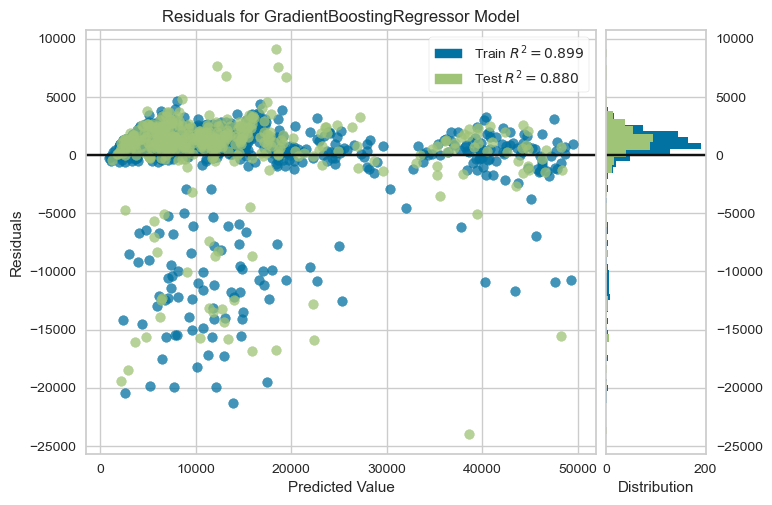

In [8]:
#Plot residuals
plot_model(best,plot='residuals')

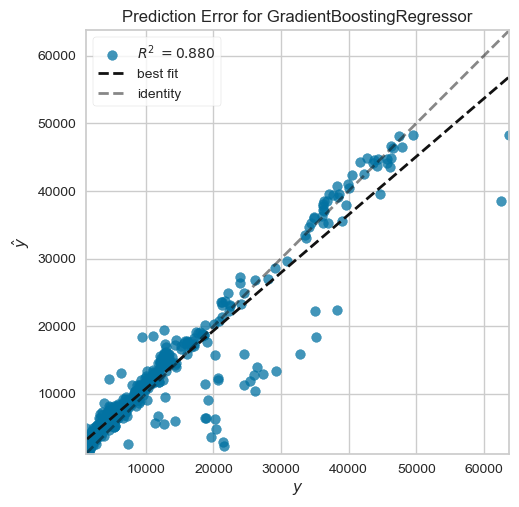

In [9]:
#plot error
plot_model(best,plot='error')

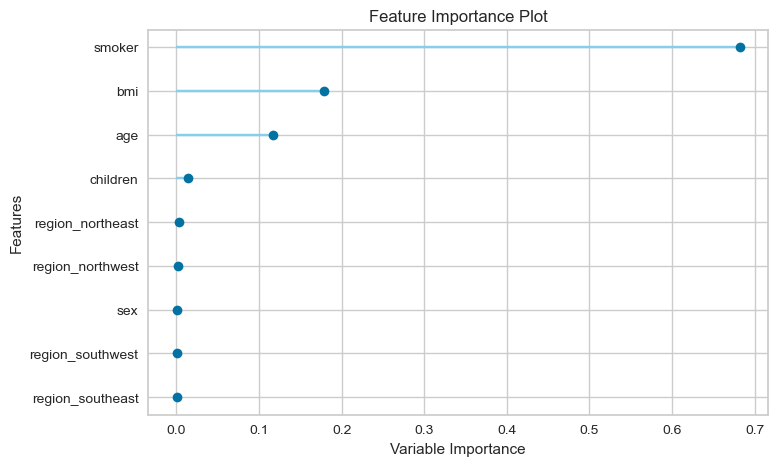

In [10]:
#plot feature importance
plot_model(best,plot='feature')

An alternative to plot_model function is the evaluate model function uses ipywidget hence this function will only work in jupyter notebooks

In [11]:

evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predictions

The predict model function returns the predictions from the best model and concats it to the input dataframe as a new column. when data is none it used the test set for scoring

In [12]:

holdout_pred=predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


In [13]:
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334


In [14]:
#create a new data from the input data by dropiing the target variable
new_data=data.copy()
new_data.drop('charges',axis=1,inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
#get the predictions from the new_data
predictions=predict_model(best,data=new_data)
predictions.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,18464.334448
1,18,male,33.770000,1,no,southeast,4020.345384
2,28,male,33.000000,3,no,southeast,6555.388388
3,33,male,22.705000,0,no,northwest,9627.045725
4,32,male,28.879999,0,no,northwest,3325.531292


### Save Model

Pycarets save_model function can now be used to save the entire pipe line on disk for later use

In [17]:
#save pipeline
save_model(best,'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\BHELDNA\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  Transforme...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                 

In [18]:
#load the pipeline
loaded_best_pipeline=load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\BHELDNA\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 Transforme...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

### Detailed overview of Pycaret fucntions

### Setup

The setup function initializes the experiment in pycaret and creates the transformation pipleline based on all the parameters passed. Set up function must be called before executing any other functiion. It takes two required parameters data and target. All other parameters are optional are used for configuring the data preprocessing pipeline

In [19]:
s=setup(data,target='charges',session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


The other varaibles used for the configuration like the transformed dataset, random_state etc can be checked with the get_config method

In [20]:
#check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [21]:
#check the training input
get_config('X')

,age,sex,bmi,children,smoker,region
300,36,male,27.549999,3,no,northeast
904,60,female,35.099998,0,no,southwest
670,30,male,31.570000,3,no,southeast
617,49,male,25.600000,2,yes,southwest
373,26,male,32.900002,2,yes,southwest
...,...,...,...,...,...,...
1221,40,male,24.969999,2,no,southeast
973,19,female,40.500000,0,no,southwest
1250,24,male,29.830000,0,yes,northeast
887,36,female,30.020000,0,no,northwest


In [22]:
#check the transformed traiining data
get_config('X_train_transformed')

,age,sex,bmi,children,smoker,region_northeast,region_southwest,region_southeast,region_northwest
300,36.0,1.0,27.549999,3.0,0.0,1.0,0.0,0.0,0.0
904,60.0,0.0,35.099998,0.0,0.0,0.0,1.0,0.0,0.0
670,30.0,1.0,31.570000,3.0,0.0,0.0,0.0,1.0,0.0
617,49.0,1.0,25.600000,2.0,1.0,0.0,1.0,0.0,0.0
373,26.0,1.0,32.900002,2.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1238,37.0,1.0,22.705000,3.0,0.0,1.0,0.0,0.0,0.0
1147,20.0,0.0,31.920000,0.0,0.0,0.0,0.0,0.0,1.0
106,19.0,0.0,28.400000,1.0,0.0,0.0,1.0,0.0,0.0
1041,18.0,1.0,23.084999,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
#Lets check the current seed
print("The current seed is:{}".format(get_config('seed')))

The current seed is:123


In [24]:
#change the seed using set_config
set_config('seed',786)
print("The current seed is:{}".format(get_config('seed')))

The current seed is:786


In [25]:
#setup with normalize=True
s=setup(data,target='charges',session_id=123,normalize=True,normalize_method='minmax')

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


<AxesSubplot: >

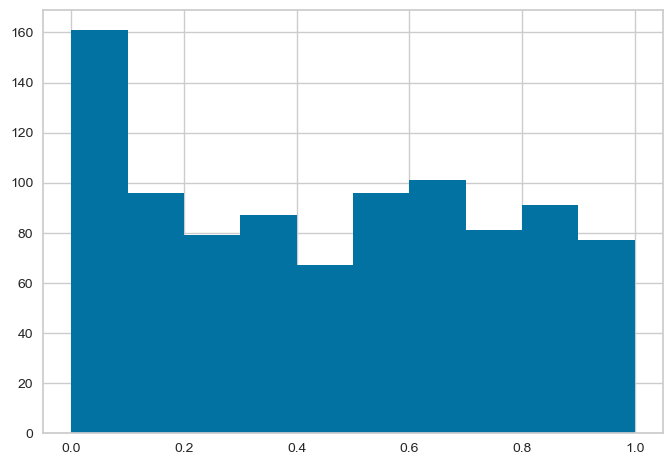

In [26]:
#In theprevious setup we didint normalize the training data. with the above setting lets see how the data is normalized
get_config('X_train_transformed')['age'].hist()

Observe that all the values are between 0 and 1. We can also access the untransformed data 

<AxesSubplot: >

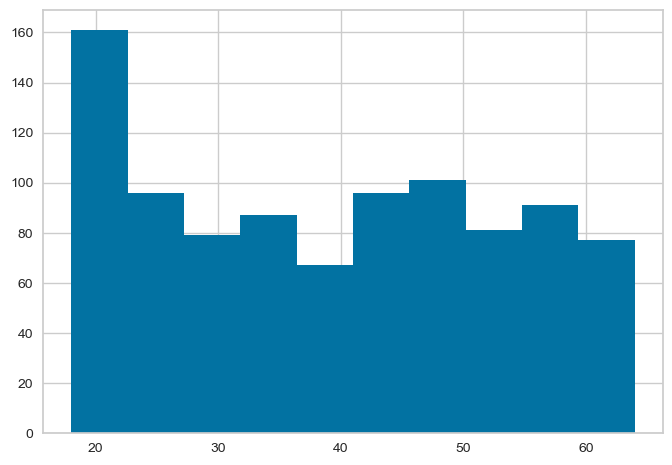

In [27]:
get_config('X_train')['age'].hist()

### Compare Models

We saw how the compare model function trains and evaluates all the models available in the model library using cross validation. The metrics evaluated during the cross validation can be accessed using the get_metrics fucntion

In [28]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,23548622.1598,4832.9291,0.8320,0.4447,0.3137,0.7140
rf,Random Forest Regressor,2772.9195,25409792.9692,5028.1973,0.8173,0.4687,0.3298,0.7950
lightgbm,Light Gradient Boosting Machine,3001.8884,25547324.5813,5044.5767,0.8147,0.5445,0.3784,0.7240
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.8180
ada,AdaBoost Regressor,4175.5916,28401799.0579,5321.7006,0.7976,0.6263,0.7144,0.7220
ridge,Ridge Regression,4296.0642,38392999.7849,6176.6160,0.7308,0.5710,0.4397,0.7550
br,Bayesian Ridge,4300.6286,38387539.9069,6176.4192,0.7307,0.5881,0.4419,0.7320
lasso,Lasso Regression,4302.2469,38386534.5553,6176.4463,0.7306,0.5913,0.4430,1.1380
llar,Lasso Least Angle Regression,4302.2480,38386602.3375,6176.4516,0.7306,0.5913,0.4430,0.7160
lr,Linear Regression,4319.3048,38413416.8070,6178.7234,0.7301,0.6209,0.4478,1.2600


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [29]:
#Lets check what are the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


We can use the include and exclude parameters in the compare models to train only selected models

In [30]:
compare_tree_models=compare_models(include=['dt','rf','et','gbr','ada','lightgbm'])

the compare_models function returns only the best performing model and only displays the scoring grid. If we want access to the scoring grid. it can be done uiing the pull() function

In [31]:
compare_tree_models_results=pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,2.354862e+07,4832.9291,0.8320,0.4447,0.3137,0.722
rf,Random Forest Regressor,2772.9195,2.540979e+07,5028.1973,0.8173,0.4687,0.3298,0.723
lightgbm,Light Gradient Boosting Machine,3001.8884,2.554732e+07,5044.5767,0.8147,0.5445,0.3784,0.725
et,Extra Trees Regressor,2833.3624,2.842784e+07,5305.6516,0.7991,0.4877,0.3363,0.726
ada,AdaBoost Regressor,4175.5916,2.840180e+07,5321.7006,0.7976,0.6263,0.7144,0.714
dt,Decision Tree Regressor,3399.1402,4.810020e+07,6915.2984,0.6476,0.5629,0.4052,0.721


The compare models function returns the best performing model based on the metric defined in the sort parameter. lets change this setting and return top 3 models based on MAE

In [32]:
best_mae_models_top3=compare_models(sort='MAE',n_select=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:41:15
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,23548622.1598,4832.9291,0.8320,0.4447,0.3137,0.7130
rf,Random Forest Regressor,2772.9195,25409792.9692,5028.1973,0.8173,0.4687,0.3298,0.7270
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.7250
lightgbm,Light Gradient Boosting Machine,3001.8884,25547324.5813,5044.5767,0.8147,0.5445,0.3784,0.7200
dt,Decision Tree Regressor,3399.1402,48100203.3847,6915.2984,0.6476,0.5629,0.4052,0.7120
huber,Huber Regressor,3461.7327,49057640.5613,6981.8576,0.6528,0.4815,0.2188,0.7250
par,Passive Aggressive Regressor,3536.1733,48501878.1363,6940.1967,0.6566,0.4785,0.2154,0.7260
knn,K Neighbors Regressor,3778.4582,38143971.2000,6165.0463,0.7277,0.5027,0.3690,0.7200
ada,AdaBoost Regressor,4175.5916,28401799.0579,5321.7006,0.7976,0.6263,0.7144,0.7190
ridge,Ridge Regression,4296.0642,38392999.7849,6176.6160,0.7308,0.5710,0.4397,0.7130


In [33]:
#list of top 3 models by MAE
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [34]:
help(compare_models)

Help on function compare_models in module pycaret.regression.functional:

compare_models(include: Union[List[Union[str, Any]], NoneType] = None, exclude: Union[List[str], NoneType] = None, fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, sort: str = 'R2', n_select: int = 1, budget_time: Union[float, NoneType] = None, turbo: bool = True, errors: str = 'ignore', fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, experiment_custom_tags: Union[Dict[str, Any], NoneType] = None, engine: Union[Dict[str, str], NoneType] = None, verbose: bool = True, parallel: Union[pycaret.internal.parallel.parallel_backend.ParallelBackend, NoneType] = None)
    This function trains and evaluates performance of all estimators available in the
    model library using cross validation. The output of this function is a score grid
    with average cross validated scores. Metrics evaluated during CV can be accessed
    using the ``get_metrics`` 

### Experiment Logging

PyCaret integrates with many different type of experiment loggers, defualt is mlflow. To turn on experiment tracking set the log_experiment and experiment_name parameters. It will automatically track all the metrics, hyper parameters and artifacts based on the defined logger

In [35]:
#set log_epmeriment and experiment name
s=setup(data,target='charges',log_experiment='mlflow',experiment_name='insurance_experiment')

,Description,Value
0,Session id,388
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [36]:
#compare models
best=compare_models()

In [37]:
#start mlflow server on localhost:5000
#!mlflow ui

The default logger can be changed using the log experiment parameter. Following are the loggers available with PyCaret.
 - mlflow
 - wandb
- comet_ml
- dagshub

### Create model

The create model function trains and evaluates the performance of a given model using cross validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accesseed using the get_metrics fucntion. add_metric and remove_metric functions can be used to add and remove custom metrics

In [38]:
#check the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [39]:
#train linear regression model with default fold=10
lr=create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4563.1866,33811263.2149,5814.7453,0.7748,0.5903,0.4535
1,4154.9563,31525801.4185,5614.7842,0.7932,0.5035,0.4566
2,4429.0750,37165163.4097,6096.3238,0.7269,0.5691,0.4828
3,4337.3365,37555470.8390,6128.2519,0.6700,0.6166,0.4376
4,3977.3978,30182982.9549,5493.9042,0.7959,0.4783,0.4089
5,3954.1803,34072063.9432,5837.1281,0.7176,0.5459,0.4935
6,3703.1775,23774650.5050,4875.9256,0.8127,0.5321,0.4408
7,3714.6204,24452315.1166,4944.9282,0.8509,0.5966,0.3646
8,5554.4281,69332480.7799,8326.6128,0.6416,0.7762,0.3848


The create model function returns the trained model as an output. The scoring grid is only displayed. If we need access to the scoring grid, we can use the pull fucntion to access those scores

In [40]:
lr_results=pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4563.1866,3.381126e+07,5814.7453,0.7748,0.5903,0.4535
1,4154.9563,3.152580e+07,5614.7842,0.7932,0.5035,0.4566
2,4429.0750,3.716516e+07,6096.3238,0.7269,0.5691,0.4828
3,4337.3365,3.755547e+07,6128.2519,0.6700,0.6166,0.4376
4,3977.3978,3.018298e+07,5493.9042,0.7959,0.4783,0.4089
5,3954.1803,3.407206e+07,5837.1281,0.7176,0.5459,0.4935
6,3703.1775,2.377465e+07,4875.9256,0.8127,0.5321,0.4408
7,3714.6204,2.445232e+07,4944.9282,0.8509,0.5966,0.3646
8,5554.4281,6.933248e+07,8326.6128,0.6416,0.7762,0.3848


In [41]:
#chenage the folds
lr=create_model('lr',fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4392.6571,34112590.0399,5840.5984,0.7611,0.4954,0.4818
1,4169.9716,33368494.1283,5776.5469,0.7391,0.6616,0.4752
2,4793.4859,49336081.6575,7023.9648,0.7410,0.5917,0.4067
Mean,4452.0382,38939055.2752,6213.7034,0.7471,0.5829,0.4546
Std,257.9885,7358081.1755,573.5378,0.0099,0.0681,0.0340


In [42]:
#use specific model parameters
lr=create_model('lr',fit_intercept=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4563.1866,33811263.2149,5814.7453,0.7748,0.5903,0.4535
1,4154.9563,31525801.4185,5614.7842,0.7932,0.5035,0.4566
2,4429.0750,37165163.4097,6096.3238,0.7269,0.5691,0.4828
3,4337.3365,37555470.8390,6128.2519,0.6700,0.6166,0.4376
4,3977.3978,30182982.9549,5493.9042,0.7959,0.4783,0.4089
5,3954.1803,34072063.9432,5837.1281,0.7176,0.5459,0.4935
6,3703.1775,23774650.5050,4875.9256,0.8127,0.5321,0.4408
7,3714.6204,24452315.1166,4944.9282,0.8509,0.5966,0.3646
8,5554.4281,69332480.7799,8326.6128,0.6416,0.7762,0.3848


In [43]:
lr=create_model('lr',fit_intercept=False,n_jobs=-1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4563.1866,33811263.2149,5814.7453,0.7748,0.5903,0.4535
1,4154.9563,31525801.4185,5614.7842,0.7932,0.5035,0.4566
2,4429.0750,37165163.4097,6096.3238,0.7269,0.5691,0.4828
3,4337.3365,37555470.8390,6128.2519,0.6700,0.6166,0.4376
4,3977.3978,30182982.9549,5493.9042,0.7959,0.4783,0.4089
5,3954.1803,34072063.9432,5837.1281,0.7176,0.5459,0.4935
6,3703.1775,23774650.5050,4875.9256,0.8127,0.5321,0.4408
7,3714.6204,24452315.1166,4944.9282,0.8509,0.5966,0.3646
8,5554.4281,69332480.7799,8326.6128,0.6416,0.7762,0.3848


In [44]:
#train linear regression and return train score along with CV
create_model('lr',return_train_score=True)

LinearRegression(n_jobs=-1)

### Tune Model

The Tune model function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross validated scores by fold.

In [45]:
#train dt model with default params
dt=create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3414.9300,44653229.6039,6682.3072,0.7026,0.4571,0.3318
1,2983.9730,41646004.8801,6453.3716,0.7268,0.4935,0.3593
2,2933.2194,37168578.1564,6096.6038,0.7268,0.4467,0.2811
3,3860.4781,51799636.6680,7197.1964,0.5448,0.5406,0.3139
4,2111.8585,27369939.8556,5231.6288,0.8149,0.5408,0.3256
5,2782.3097,39091620.6227,6252.3292,0.6760,0.5127,0.3334
6,3906.4652,67626852.4162,8223.5547,0.4672,0.5041,0.4240
7,2435.7112,29110006.2658,5395.3690,0.8225,0.3760,0.2641
8,3710.1408,58656298.4550,7658.7400,0.6968,0.6167,0.2058


In [46]:
#tune hyperparameters for the dt model
tuned_dt=tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1961.6066,19743969.8444,4443.4187,0.8685,0.2712,0.1171
1,1428.6410,11786568.3677,3433.1572,0.9227,0.3121,0.1064
2,1924.6772,20849322.0689,4566.1058,0.8468,0.3379,0.1410
3,2345.8378,28637625.4022,5351.4134,0.7484,0.4676,0.1907
4,1663.6341,19061486.1066,4365.9462,0.8711,0.4211,0.1222
5,1906.5875,26481650.1307,5146.0325,0.7805,0.3990,0.1195
6,1528.2398,17023861.0812,4125.9982,0.8659,0.2737,0.0991
7,1113.7103,7533634.9493,2744.7468,0.9541,0.1838,0.0868
8,3353.4597,53568704.4103,7319.0644,0.7231,0.5887,0.1565


Fitting 10 folds for each of 10 candidates, totalling 100 fits


The tuned model function accepts a optimize parameter which can be used to specify the metric to optimize. Also a custom grid with the parameters to be tuned can also be passed as a custom grid

In [47]:
dt

DecisionTreeRegressor(random_state=388)

In [48]:
#lets define a custom grid for the dt model
dt_grid={'max_depth': [None,2,4,6,8,10,12]}

#tune the dt model with the custom grid and mtric as MAE
tuned_dt=tune_model(dt,custom_grid=dt_grid,optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2704.0999,16732873.8154,4090.5836,0.8886,0.3540,0.2939
1,2548.0074,18002978.5987,4242.9917,0.8819,0.4089,0.3235
2,2679.6972,19747867.5080,4443.8573,0.8549,0.3858,0.3085
3,2869.0621,23249659.1805,4821.7900,0.7957,0.4909,0.3745
4,2456.4255,18528709.6899,4304.4988,0.8747,0.4430,0.2954
5,2928.5335,26116996.6588,5110.4791,0.7835,0.4729,0.3913
6,2663.2921,21700009.1069,4658.3269,0.8290,0.3503,0.2856
7,2230.1633,9605249.2968,3099.2337,0.9414,0.3875,0.3333
8,3989.3791,51202994.4359,7155.6268,0.7353,0.5590,0.2930


Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [49]:
#the tuner object can be returned by setting the return_tuner=True
tuned_dt,tuner=tune_model(dt,return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1961.6066,19743969.8444,4443.4187,0.8685,0.2712,0.1171
1,1428.6410,11786568.3677,3433.1572,0.9227,0.3121,0.1064
2,1924.6772,20849322.0689,4566.1058,0.8468,0.3379,0.1410
3,2345.8378,28637625.4022,5351.4134,0.7484,0.4676,0.1907
4,1663.6341,19061486.1066,4365.9462,0.8711,0.4211,0.1222
5,1906.5875,26481650.1307,5146.0325,0.7805,0.3990,0.1195
6,1528.2398,17023861.0812,4125.9982,0.8659,0.2737,0.0991
7,1113.7103,7533634.9493,2744.7468,0.9541,0.1838,0.0868
8,3353.4597,53568704.4103,7319.0644,0.7231,0.5887,0.1565


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [50]:
#tuned model object
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=15,
                      max_features=1.0, min_impurity_decrease=0.005,
                      min_samples_leaf=5, min_samples_split=5,
                      random_state=388)

In [51]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\BHELDNA\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['age',
                                                                          'bmi',
                                                                          'children'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['sex',
                                                                          'smoker',
                                                                          'region'],
                                                                 t...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=388, refit=False, scoring='r2', verbose=1)

The default search algorithm is the RandomSearchCV from sklearn. This can be changed using the search_libray and search_algorithm parameter

In [52]:
tuned_dt=tune_model(dt,search_library='optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2243.8903,19521047.9579,4418.2630,0.8700,0.3470,0.2096
1,1785.3214,16886183.8990,4109.2802,0.8892,0.3172,0.1343
2,1910.8175,20246934.7328,4499.6594,0.8512,0.3360,0.1440
3,2286.5832,26332824.9146,5131.5519,0.7686,0.4715,0.1899
4,1971.2686,22642365.9982,4758.3995,0.8469,0.4823,0.2157
5,2034.4618,26822207.8943,5179.0161,0.7777,0.3855,0.1319
6,1825.7552,18041248.6065,4247.4991,0.8579,0.3135,0.1397
7,1285.0979,8377671.1108,2894.4207,0.9489,0.1952,0.1030
8,3493.3101,54037673.5403,7351.0321,0.7207,0.6013,0.1756


[I 2023-09-25 09:52:43,621] Searching the best hyperparameters using 936 samples...
[I 2023-09-25 09:53:30,822] Finished hyperparameter search!


Check the documentation for more search algorithms available in the search library

In [53]:
help(tune_model)

Help on function tune_model in module pycaret.regression.functional:

tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'R2', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Union[str, NoneType] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs)
    This function tunes the hyperparameters of a given estimator. The output of
    this function is a score grid with CV scores by fold of the best selected
    model based on ``optimize`` parameter. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``a

### Ensemble Model

The ensemble function ensembles a given estimator. The output is a scoring grid with CV scores by fold. 

In [54]:
#Ensemble with bagging
ensemble_model(dt,method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2983.0456,22161357.2201,4707.5851,0.8524,0.3973,0.3085
1,2705.9786,24685470.7737,4968.4475,0.8381,0.4924,0.3824
2,2473.6590,22284441.0079,4720.6399,0.8362,0.4142,0.2745
3,3163.9356,28654183.8686,5352.9603,0.7482,0.4584,0.3225
4,2397.3875,20971532.1683,4579.4685,0.8582,0.5013,0.3040
5,3136.2264,29972176.8938,5474.6851,0.7516,0.4282,0.3012
6,2883.8819,23128013.4925,4809.1593,0.8178,0.4082,0.3369
7,2032.6400,10678242.7953,3267.7581,0.9349,0.3015,0.2248
8,3869.4686,57217537.2990,7564.2275,0.7042,0.5969,0.2539


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=388),
                 random_state=388)

In [55]:
#Ensemble with Boosting
ensemble_model(dt,method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3119.2277,39625562.0740,6294.8838,0.7361,0.4818,0.3643
1,2432.5741,31376110.1584,5601.4382,0.7942,0.4954,0.3702
2,2058.8789,22718590.5413,4766.4023,0.8330,0.3525,0.1453
3,2808.3437,33517069.7589,5789.3929,0.7055,0.5027,0.2572
4,1694.7546,19610590.1124,4428.3846,0.8674,0.4139,0.1218
5,2580.9868,35810725.0008,5984.2063,0.7032,0.4689,0.2578
6,2155.8600,24342213.3961,4933.7829,0.8082,0.3524,0.1961
7,1091.9132,5803176.3535,2408.9783,0.9646,0.1883,0.0969
8,3381.3880,54364706.5551,7373.2426,0.7190,0.5963,0.1907


AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=388),
                  n_estimators=10, random_state=388)

Other parameters like the n_estimators, choose better etc are avaialbel to this fucntion which can be very useful

### Blend Models

The blend_models function trains a votingRegressor for select models available in the estimator list

In [56]:
#top 3 models based on based on mae
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [57]:
#blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2605.3267,18622151.2738,4315.3391,0.8760,0.3675,0.2912
1,2500.4825,21324099.1341,4617.8024,0.8601,0.4414,0.3323
2,2637.2938,19489978.0697,4414.7455,0.8568,0.3962,0.2885
3,3012.5371,25459090.9030,5045.7002,0.7763,0.4633,0.3417
4,2326.5778,19784235.5146,4447.9473,0.8662,0.4631,0.2620
5,2728.6138,25786641.4911,5078.0549,0.7863,0.4116,0.2896
6,2573.0702,18122098.5223,4257.0058,0.8572,0.3549,0.2983
7,1797.2218,7249133.5527,2692.4215,0.9558,0.2937,0.2326
8,3684.7230,52092424.4496,7217.5082,0.7307,0.5927,0.2445


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

Some other parameters that can be useful with the blend_models function are weights, optimize,choose_better etc

In [58]:
help(blend_models)

Help on function blend_models in module pycaret.regression.functional:

blend_models(estimator_list: list, fold: Union[int, Any, NoneType] = None, round: int = 4, choose_better: bool = False, optimize: str = 'R2', weights: Union[List[float], NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False)
    This function trains a Voting Regressor for select models passed in the
    ``estimator_list`` param. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> top3 = compare_mod

### Stack Models

The stack_models fucntion trains a meta-model over the select estimators passed in the estimator_list parameter

In [59]:
#stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2671.7304,16865191.9571,4106.7252,0.8877,0.3471,0.2874
1,2426.6852,18526920.1560,4304.2909,0.8785,0.3787,0.2799
2,2742.0349,18981132.8237,4356.7342,0.8605,0.4408,0.3279
3,2869.2691,23139806.1046,4810.3852,0.7967,0.4283,0.3097
4,2227.7256,18113523.4455,4255.9985,0.8775,0.7263,0.2391
5,2741.9936,26035800.4165,5102.5288,0.7842,0.4800,0.2941
6,2422.9274,16572031.5621,4070.8760,0.8694,0.3210,0.2432
7,1836.7067,7342847.7150,2709.7689,0.9552,0.2557,0.2115
8,3769.5900,51070539.8254,7146.3655,0.7360,0.5988,0.2473


StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

Other parameters that can be helpful with stack_models are restack,meta_model,chosse_better etc

In [60]:
help(stack_models)

Help on function stack_models in module pycaret.regression.functional:

stack_models(estimator_list: list, meta_model=None, meta_model_fold: Union[int, Any, NoneType] = 5, fold: Union[int, Any, NoneType] = None, round: int = 4, restack: bool = True, choose_better: bool = False, optimize: str = 'R2', fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False)
    This function trains a meta model over select estimators passed in
    the ``estimator_list`` parameter. The output of this function is a
    score grid with CV scores by fold. Metrics evaluated during CV can
    be accessed using the ``get_metrics`` function. Custom metrics
    can be added or removed using ``add_metric`` and ``remove_metric``
    function.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = bost

### Plot Model

The plot_model function analyzes the performance of a trained model on a test set. It may need retraining a model sometimes

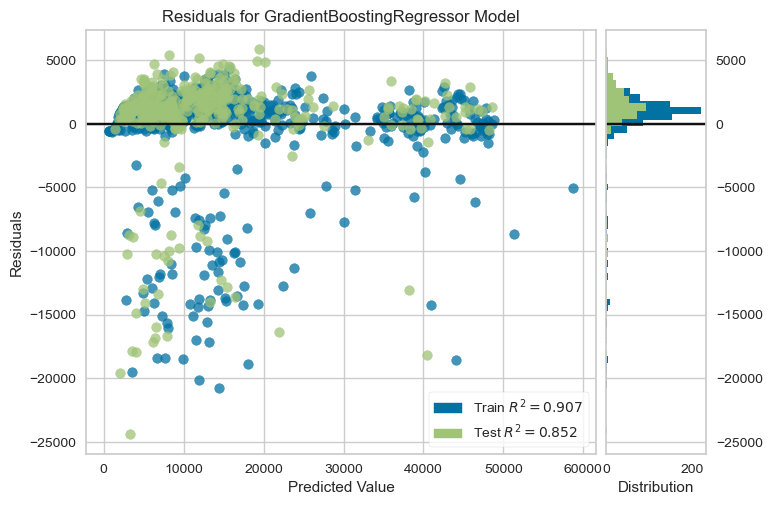

In [61]:
#plot residuals
plot_model(best,plot='residuals')

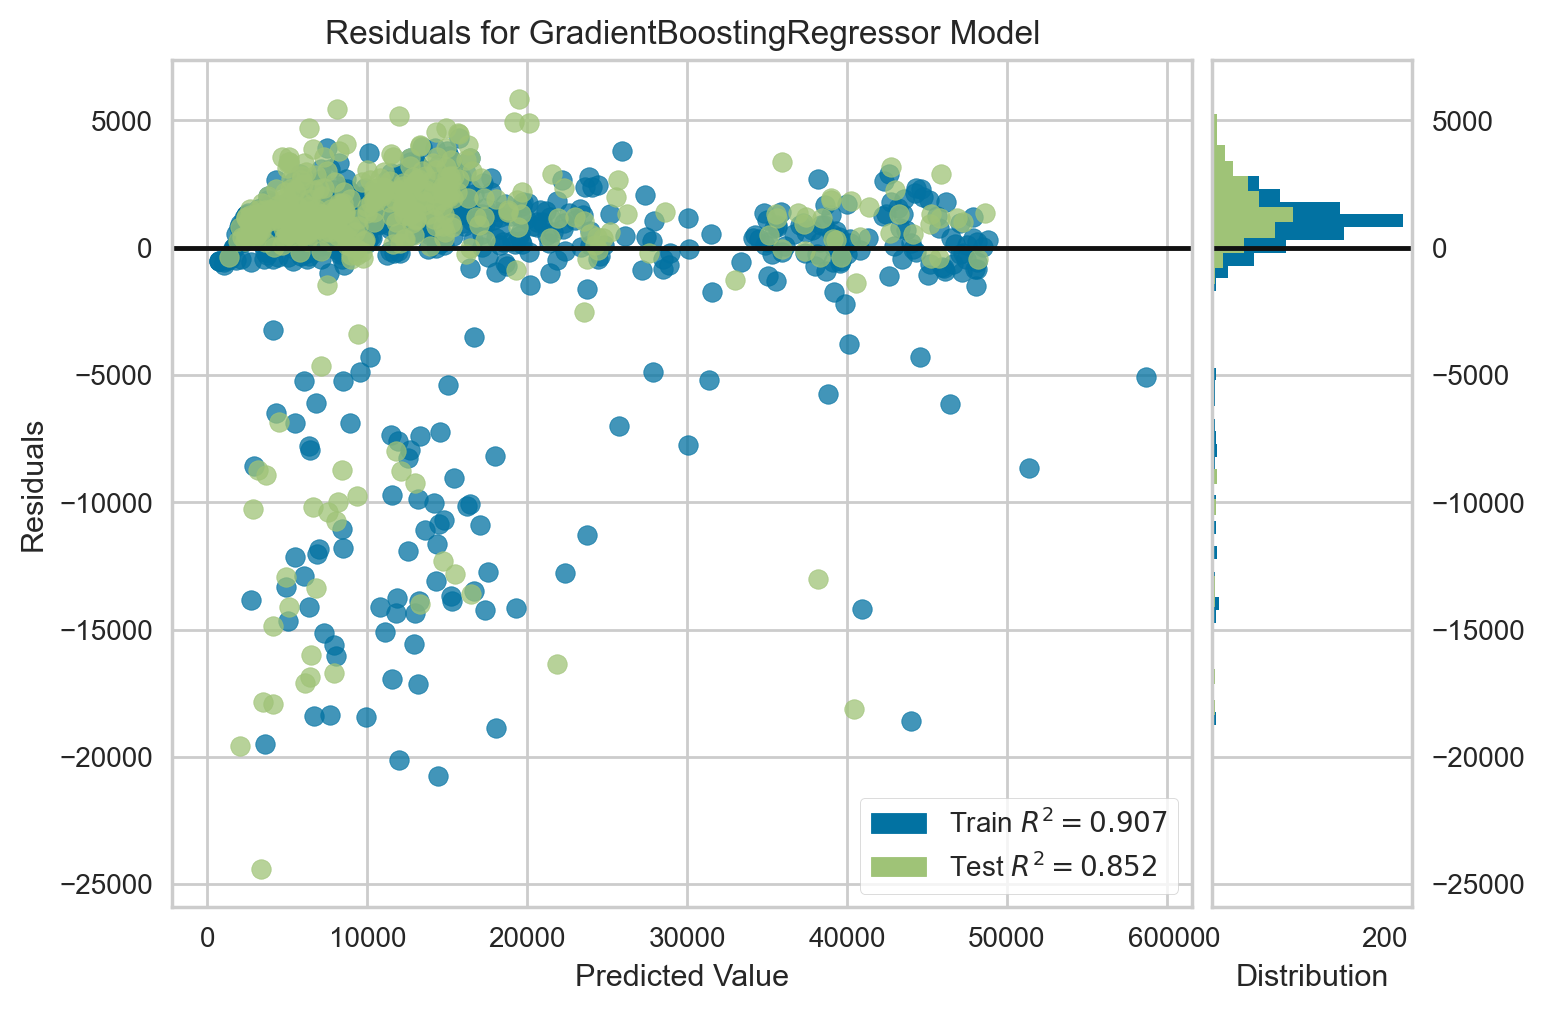

In [62]:
#control the scale of the plot
plot_model(best,plot='residuals',scale=2)

In [63]:
#saving the plot
plot_model(best,plot='residuals',save=True)

'Residuals.png'

In [64]:
help(plot_model)

Help on function plot_model in module pycaret.regression.functional:

plot_model(estimator, plot: str = 'residuals', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, plot_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Union[str, NoneType] = None) -> Union[str, NoneType]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'residual')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'residual'
        List of available plo

### Interpret Model

The interpret_model analyzes the predictions generated from a trained model

In [65]:
#train lightgbm model
lightbgm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3030.7529,21516972.0646,4638.6390,0.8567,0.4121,0.3349
1,2780.5951,21922538.6983,4682.1511,0.8562,0.4522,0.3483
2,2710.0653,20801678.3871,4560.8857,0.8471,0.4653,0.3381
3,3170.8016,25990856.6679,5098.1229,0.7716,0.5660,0.4087
4,2549.3232,21404017.1694,4626.4476,0.8552,0.5391,0.3047
5,3021.3714,29526984.6365,5433.8738,0.7553,0.5099,0.3407
6,2806.6714,17893217.0316,4230.0375,0.8590,0.4166,0.3345
7,2255.2781,10738087.7468,3276.9022,0.9345,0.4748,0.2884
8,3974.1091,52139066.3492,7220.7386,0.7305,0.6058,0.3305


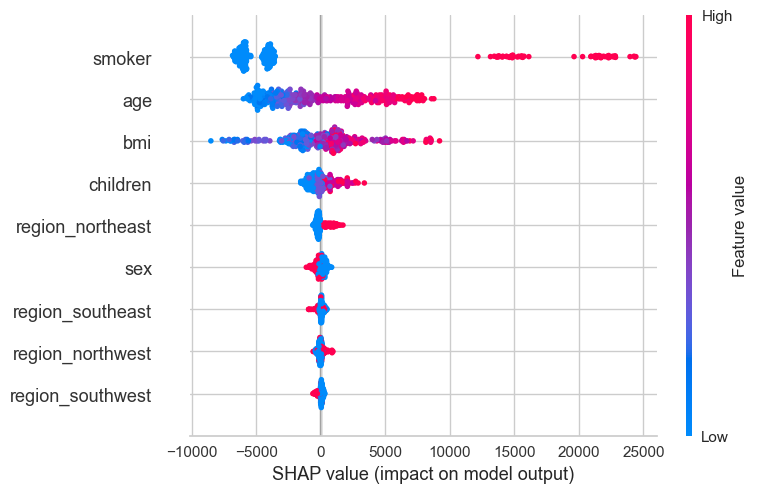

In [66]:
#interpret summary model
interpret_model(lightbgm,plot='summary')

In [67]:
#reason plot for test set observation 1
interpret_model(lightbgm,plot='reason',observation=1)

Other parameters that can be useful with interpret_model are plot,feature,use_train_data etc

In [68]:
help(interpret_model)

Help on function interpret_model in module pycaret.regression.functional:

interpret_model(estimator, plot: str = 'summary', feature: Union[str, NoneType] = None, observation: Union[int, NoneType] = None, use_train_data: bool = False, X_new_sample: Union[pandas.core.frame.DataFrame, NoneType] = None, y_new_sample: Union[pandas.core.frame.DataFrame, NoneType] = None, save: Union[str, bool] = False, **kwargs)
    This function takes a trained model object and returns an interpretation plot
    based on the test / hold-out set.
    
    This function is implemented based on the SHAP (SHapley Additive exPlanations),
    which is a unified approach to explain the output of any machine learning model.
    SHAP connects game theory with local explanations.
    
    For more information: https://shap.readthedocs.io/en/latest/
    
    For more information on Partial Dependence Plot: https://github.com/SauceCat/PDPbox
    
    
    Example
    --------
    >>> from pycaret.datasets import get_d

### Get Leaderboard

This function returns the leaderbopard of all the models trained in the current experiment

In [69]:
#get Leaderboard
lb=get_leaderboard()
lb

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4397.9756,3.841923e+07,6102.6913,0.7507,0.5858,0.4431
1,Lasso Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4397.9924,3.841796e+07,6102.5711,0.7507,0.5847,0.4431
2,Ridge Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4408.7072,3.842328e+07,6103.2460,0.7507,0.5862,0.4446
3,Elastic Net,"(TransformerWrapper(include=['age', 'bmi', 'ch...",7479.8195,9.233374e+07,9552.7907,0.3975,0.7266,0.9094
4,Least Angle Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4397.9756,3.841923e+07,6102.6913,0.7507,0.5858,0.4431
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4397.9909,3.841797e+07,6102.5719,0.7507,0.5847,0.4431
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['age', 'bmi', 'ch...",9398.7861,1.399539e+08,11768.9827,0.0849,0.8838,1.1667
7,Bayesian Ridge,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4403.7754,3.842072e+07,6102.9449,0.7507,0.5852,0.4439
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4690.2758,5.985162e+07,7640.1651,0.6153,0.4628,0.3707


In [70]:
#Select the best model based on MAE
lb.sort_values(by='MAE',ascending=True)['Model'].iloc[0]

Pipeline(memory=FastMemory(location=C:\Users\BHELDNA\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 Transforme...
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ['trained_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=15,
                                       max_features=1.0,
                                       min_impurity_decrease=0.005,
                                       min_samples_leaf=5, min_samples_split=5,
                                       random_state=388)]])

Some parameters that can be useful with this function are finalize_models,model_only etc

In [71]:
help(get_leaderboard)

Help on function get_leaderboard in module pycaret.regression.functional:

get_leaderboard(finalize_models: bool = False, model_only: bool = False, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True) -> pandas.core.frame.DataFrame
    This function returns the leaderboard of all models trained in the
    current setup.
    
    
    Example
    -------
    >>> from pycaret.regression import get_leaderboard
    >>> leaderboard = get_leaderboard()
    
    
    finalize_models: bool, default = False
        If True, will finalize all models in the 'Model' column.
    
    
    model_only: bool, default = False
        When set to False, only model object is returned, instead
        of the entire pipeline.
    
    
    fit_kwargs: dict, default = {} (empty dict)
        Dictionary of arguments passed to the fit method of the model.
        Ignored if finalize_models is False.
    
    
    groups: str or array-like, with shape (n_sam

### AutoML

This fucntion returns the best model out of all the trained models in the current experiment based on the optimize parameter

In [72]:
#find the best model based on the CV metrics
automl()

GradientBoostingRegressor(random_state=388)

### Dashboard

The dashboard function generates the interactive dashboard for a trained mode. The dashboard is implemented using ExplainerDashboard

In [73]:
#dashboard function
dashboard(dt,display_format='inline')

ModuleNotFoundError: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

### Create APP

This function creates a basic gradio app for inference

In [74]:
#create gradio app
create_app(best)

ModuleNotFoundError: 
'gradio' is a soft dependency and not included in the pycaret installation. Please run: `pip install gradio` to install.
Alternately, you can install this by running `pip install pycaret[mlops]`

### Create API

This function takes an input model and creates a POST API for inference

In [75]:
#create api
create_api(best,api_name='my_first_api')

ModuleNotFoundError: 
'fastapi' is a soft dependency and not included in the pycaret installation. Please run: `pip install fastapi` to install.
Alternately, you can install this by running `pip install pycaret[mlops]`

### Create Docker

Tis fucntion creates a Dockerfile and requirements.txt for productionalizing API end-point

In [76]:
#create docker file
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


### Finalize model

This fucntion trains a given model on the entire dataset including the hold-out set

In [77]:
final_best=finalize_model(best)

In [78]:
final_best

Pipeline(memory=FastMemory(location=C:\Users\BHELDNA\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 Transforme...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=388))])

### Convert model



In [79]:
#tranpiles learned function to java
print(convert_model(dt,language='java'))

ModuleNotFoundError: 
'm2cgen' is a soft dependency and not included in the pycaret installation. Please run: `pip install m2cgen` to install.

### Deploy Model

In [ ]:
#deploy_model(best,model_name='my_first_platform_on_aws,platform='aws',authentication={'bucket':'pycaret-test}

### Save Model

This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use

In [80]:
#save model
save_model(best,'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\BHELDNA\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  Transforme...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                 

### Save Experiment

This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup fucntion

In [81]:
#save experiment
save_experiment('my_experiment')

In [82]:
#load experiment
exp_from_disk=load_experiment('my_experiment',data=data)

,Description,Value
0,Session id,1624
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3
